In [5]:
import pandas as pd  
import seaborn as sb 
import numpy as np 
from matplotlib import rcParams 
import matplotlib.pyplot as plt  
%matplotlib inline 
sb.set_style('whitegrid') 
fig = plt.figure()  
df=pd.read_csv('train.csv') 
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
df = df.drop('Cabin',1) 
df = df.dropna(axis=0) 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


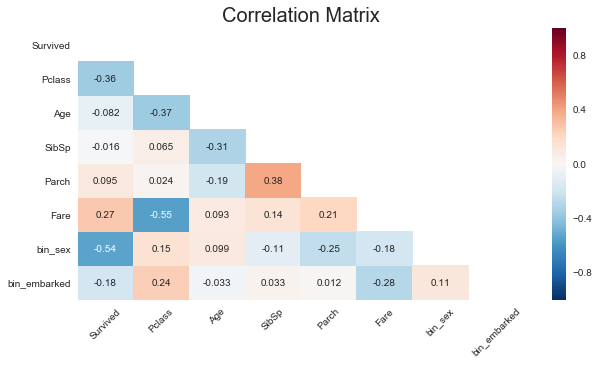

In [9]:
from sklearn.preprocessing import LabelEncoder 
plt.figure(figsize=(10,5)) 
num = LabelEncoder()  
data = df.loc[:,('Survived','Pclass','Age','SibSp','Parch','Fare')]  
data['bin_sex'] = num.fit_transform(df['Sex'].astype('str'))
data['bin_embarked'] = num.fit_transform(df['Embarked'].astype('str'))  
corr = data.corr() 
mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask)] = True 
sb.heatmap(corr,mask=mask,annot=True) 
plt.xticks(rotation= 45) 
plt.title('Correlation Matrix',fontsize=20)